In [1]:
!ls names.txt || wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

names.txt


In [2]:
with open("names.txt", "r") as f:
    text = f.read()

samples = text.splitlines()
num_samples = len(samples)
print("Number of samples:", num_samples)
print(samples[:10])

Number of samples: 32033
['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [3]:
# For a word of length n, we have n + 1 bigrams including the special start and end tokens

start_or_end_token = "<S>"

print(samples[0], "\n")
chars = [start_or_end_token] + list(samples[0]) + [start_or_end_token]
for i, (ch1, ch2) in enumerate(zip(chars, chars[1:]), 1):
    print(f"{i}) {ch1} {ch2}")

emma 

1) <S> e
2) e m
3) m m
4) m a
5) a <S>


In [4]:
from collections import Counter
from pprint import pprint

bigrams = []
for sample in samples:
    chars = [start_or_end_token] + list(sample) + [start_or_end_token]
    for ch1, ch2 in zip(chars, chars[1:]):
        bigram = (ch1, ch2)
        bigrams.append(bigram)

bigram_counts = Counter(bigrams)
print("Number of bigrams:", len(bigram_counts), "\n")
pprint(bigram_counts)

Number of bigrams: 627 

Counter({('n', '<S>'): 6763,
         ('a', '<S>'): 6640,
         ('a', 'n'): 5438,
         ('<S>', 'a'): 4410,
         ('e', '<S>'): 3983,
         ('a', 'r'): 3264,
         ('e', 'l'): 3248,
         ('r', 'i'): 3033,
         ('n', 'a'): 2977,
         ('<S>', 'k'): 2963,
         ('l', 'e'): 2921,
         ('e', 'n'): 2675,
         ('l', 'a'): 2623,
         ('m', 'a'): 2590,
         ('<S>', 'm'): 2538,
         ('a', 'l'): 2528,
         ('i', '<S>'): 2489,
         ('l', 'i'): 2480,
         ('i', 'a'): 2445,
         ('<S>', 'j'): 2422,
         ('o', 'n'): 2411,
         ('h', '<S>'): 2409,
         ('r', 'a'): 2356,
         ('a', 'h'): 2332,
         ('h', 'a'): 2244,
         ('y', 'a'): 2143,
         ('i', 'n'): 2126,
         ('<S>', 's'): 2055,
         ('a', 'y'): 2050,
         ('y', '<S>'): 2007,
         ('e', 'r'): 1958,
         ('n', 'n'): 1906,
         ('y', 'n'): 1826,
         ('k', 'a'): 1731,
         ('n', 'i'): 1725,
        

In [5]:
vocabulary = sorted(set("".join(samples)))
print("Vocabulary size:", len(vocabulary), "\n")
print(vocabulary)

Vocabulary size: 26 

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [6]:
ctoi = {c: i + 1 for i, c in enumerate(vocabulary)}
ctoi[start_or_end_token] = 0
ctoi = dict(sorted(ctoi.items(), key=lambda x: x[1]))

itoc = {i + 1: c for i, c in enumerate(vocabulary)}
itoc[0] = start_or_end_token
itoc = dict(sorted(itoc.items()))

encode = lambda x: [ctoi[start_or_end_token]] + [ctoi[c] for c in x] + [ctoi[start_or_end_token]]
decode = lambda x: "".join([itoc[i] for i in x])

print(samples[0])
encoding = encode(samples[0])
print(encoding)
print(decode(encoding))

emma
[0, 5, 13, 13, 1, 0]
<S>emma<S>


In [278]:
import torch

bigram_counts = torch.zeros((len(vocabulary) + 1, len(vocabulary) + 1), dtype=torch.int32)
for sample in samples:
    chars = [start_or_end_token] + list(sample) + [start_or_end_token]
    for ch1, ch2 in zip(chars, chars[1:]):
        id1, id2 = ctoi[ch1], ctoi[ch2]
        bigram_counts[id1, id2] += 1
print(bigram_counts.shape)
print(bigram_counts)

torch.Size([27, 27])
tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  1

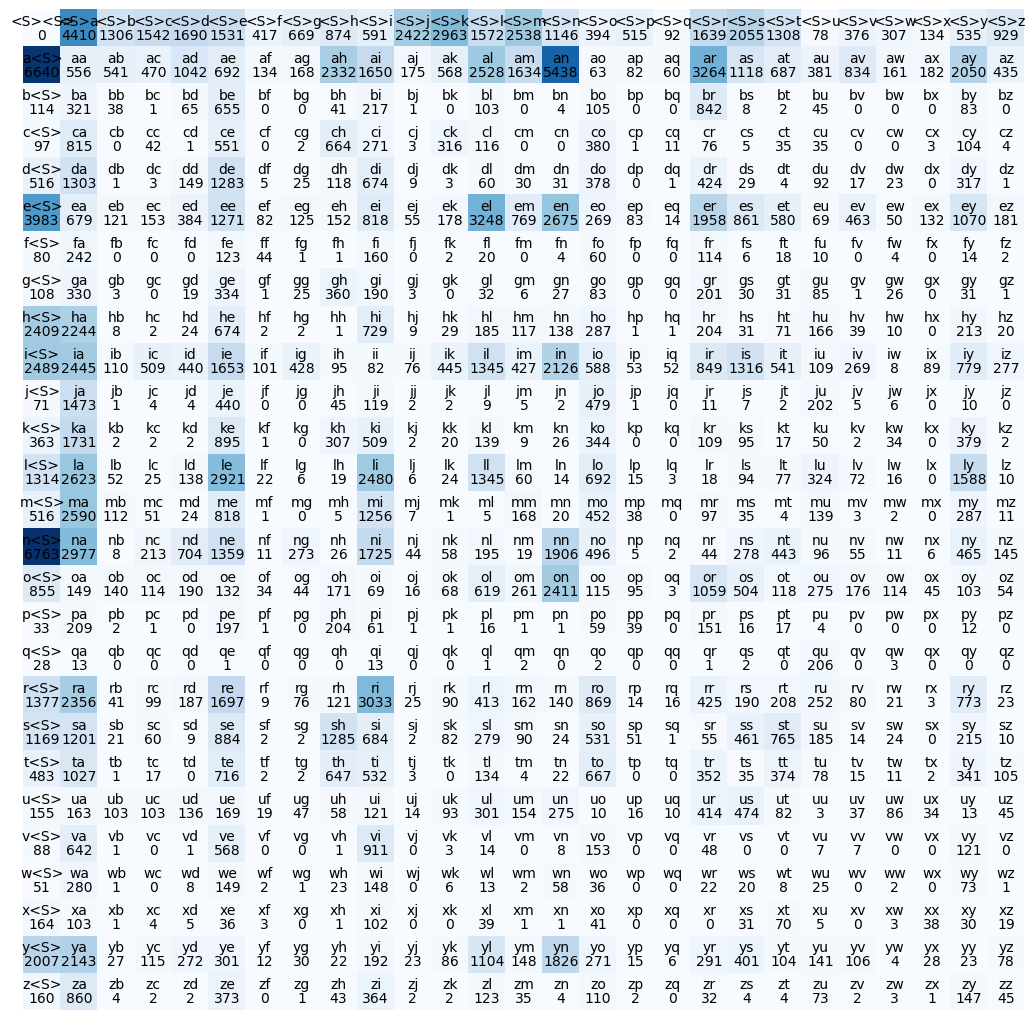

In [279]:
import matplotlib.pyplot as plt
%matplotlib inline

w = len(vocabulary) + 1
plt.figure(figsize=(w // 2, w // 2))
plt.imshow(bigram_counts, cmap="Blues")
for i in range(w):
    for j in range(w):
        bigram = itoc[i] + itoc[j]
        plt.text(j, i, bigram, ha="center", va="bottom")
        plt.text(j, i, bigram_counts[i, j].item(), ha="center", va="top")
plt.axis(False)
plt.show()

In [280]:
# Add C to all counts to prevent log(0) = -inf

C = 1 # Higher C = Smoother / More uniform distribution
bigram_probabilities = (bigram_counts + C) / bigram_counts.sum(dim=1, keepdim=True)
print(bigram_probabilities)

tensor([[3.1218e-05, 1.3770e-01, 4.0802e-02, 4.8169e-02, 5.2789e-02, 4.7826e-02,
         1.3049e-02, 2.0916e-02, 2.7316e-02, 1.8481e-02, 7.5641e-02, 9.2530e-02,
         4.9106e-02, 7.9262e-02, 3.5807e-02, 1.2331e-02, 1.6108e-02, 2.9033e-03,
         5.1197e-02, 6.4184e-02, 4.0864e-02, 2.4662e-03, 1.1769e-02, 9.6151e-03,
         4.2144e-03, 1.6733e-02, 2.9033e-02],
        [1.9599e-01, 1.6438e-02, 1.5995e-02, 1.3900e-02, 3.0781e-02, 2.0452e-02,
         3.9841e-03, 4.9875e-03, 6.8851e-02, 4.8724e-02, 5.1940e-03, 1.6792e-02,
         7.4635e-02, 4.8251e-02, 1.6051e-01, 1.8887e-03, 2.4495e-03, 1.8002e-03,
         9.6355e-02, 3.3023e-02, 2.0304e-02, 1.1273e-02, 2.4642e-02, 4.7809e-03,
         5.4006e-03, 6.0528e-02, 1.2867e-02],
        [4.3478e-02, 1.2174e-01, 1.4745e-02, 7.5614e-04, 2.4953e-02, 2.4802e-01,
         3.7807e-04, 3.7807e-04, 1.5879e-02, 8.2420e-02, 7.5614e-04, 3.7807e-04,
         3.9319e-02, 3.7807e-04, 1.8904e-03, 4.0076e-02, 3.7807e-04, 3.7807e-04,
         3.1871e-

In [281]:
# keepdim is necessary because broadcasting effects will be different
# https://pytorch.org/docs/stable/notes/broadcasting.html

broadcast_target = 2
print("No keepdim (Replication of rows; All elements in a column are divided by the same number)")
print("Results in normalization of columns")
print(bigram_counts.sum(1).repeat(broadcast_target, 1), "\n")
print("With keepdim (Replication of columns; All elements in a row are divided by the same number)")
print("Results in normalization of rows")
print(bigram_counts.sum(1, keepdim=True).repeat(1, broadcast_target))

No keepdim (Replication of rows; All elements in a column are divided by the same number)
Results in normalization of columns
tensor([[32033, 33885,  2645,  3532,  5496, 20423,   905,  1927,  7616, 17701,
          2900,  5040, 13958,  6642, 18327,  7934,  1026,   272, 12700,  8106,
          5570,  3135,  2573,   929,   697,  9776,  2398],
        [32033, 33885,  2645,  3532,  5496, 20423,   905,  1927,  7616, 17701,
          2900,  5040, 13958,  6642, 18327,  7934,  1026,   272, 12700,  8106,
          5570,  3135,  2573,   929,   697,  9776,  2398]]) 

With keepdim (Replication of columns; All elements in a row are divided by the same number)
Results in normalization of rows
tensor([[32033, 32033],
        [33885, 33885],
        [ 2645,  2645],
        [ 3532,  3532],
        [ 5496,  5496],
        [20423, 20423],
        [  905,   905],
        [ 1927,  1927],
        [ 7616,  7616],
        [17701, 17701],
        [ 2900,  2900],
        [ 5040,  5040],
        [13958, 13958],


In [282]:
torch.manual_seed(21474833647)

i = 0
generation = []
while True:
    next_probabilities = bigram_probabilities[i]
    i = torch.multinomial(next_probabilities, num_samples=1, replacement=True).item()
    next_c = itoc[i]
    generation.append(next_c)
    if next_c == start_or_end_token:
        print("".join(generation[:-1]))
        i = 0
        generation = []
        input()

dostyn

kash

rireuka

pianavy

jiny


KeyboardInterrupt: Interrupted by user

In [283]:
# We want to maximize likelihood of the training data w.r.t. the model parameters
# equivalent to maximizing log likelihood (log(a*b*c) = log(a) + log(b) + log(c))
# equivalent to minimizing negative log likelihood (typically averaged)

n = 0
log_likelihood = 0
for sample in samples:
    chars = [start_or_end_token] + list(sample) + [start_or_end_token]
    for ch1, ch2 in zip(chars, chars[1:]):
        id1, id2 = ctoi[ch1], ctoi[ch2]
        p = bigram_probabilities[id1, id2]
        log_p = torch.log(p)
        log_likelihood += log_p
        n += 1
        # print(ch1, ch2, p.item())
negative_log_likelihood = -log_likelihood
loss = negative_log_likelihood / n
print("Loss:", loss.item())

Loss: 2.4515998363494873


In [284]:
xs, ys = [], []
for sample in samples:
    chars = [start_or_end_token] + list(sample) + [start_or_end_token]
    for ch1, ch2 in zip(chars, chars[1:]):
        id1, id2 = ctoi[ch1], ctoi[ch2]
        xs.append(id1)
        ys.append(id2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs.shape)
print(ys.shape)

torch.Size([228146])
torch.Size([228146])


In [285]:
import torch.nn.functional as F

x_encodings = F.one_hot(xs, num_classes=len(vocabulary) + 1).float()
print(x_encodings.shape)
print(x_encodings)

torch.Size([228146, 27])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 1., 0., 0.]])


In [291]:
# Each column of the weights matrix represents the weights of a single neuron
# Each element of resulting matrix (x_encodings @ weights)[i, j] = i_th encoding * j_th neuron's weights

# Here we are implementing a neural net with a single linear layer
# connecting vocab_size input neurons to vocab_size output neurons
torch.manual_seed(2147483647)

weights = torch.randn((len(vocabulary) + 1, len(vocabulary) + 1))

i, j = 3, 13
print((x_encodings @ weights)[i, j])
print((x_encodings[i] * weights[:, j]).sum())

tensor(0.0379)
tensor(0.0379)


In [292]:
logits = x_encodings[:len(samples[0]) + 1] @ weights
bigram_counts = logits.exp()
bigram_probabilities = bigram_counts / bigram_counts.sum(dim=1, keepdim=True)

# We interpret the probabilities as:
# When we feed x_encodings[i] into the neural net, bigram_probabilities[i] represents 
# the probability distribution of the next character
negative_log_likelihoods = torch.zeros(len(xs))
for i in range(len(samples[0]) + 1):
    x = xs[i].item()
    y = ys[i].item()
    print(f"\x1b[31;40m Bigram {i + 1}:", f"{itoc[x]}{itoc[y]}", "\x1b[0m\n")
    print("Input to neural net")
    print(x_encodings[i], "\n")
    print("Output probabilities from neural net")
    print(bigram_probabilities[i], "\n")
    print("Actual Label:", y)
    p = bigram_probabilities[i][y]
    print("Probability calclated by neural net for correct next character:", p.item())
    log_p = torch.log(p)
    print("Log Likelihood:", log_p.item())
    negative_log_likelihood = -log_p
    print("Negative Log Likelihood:", negative_log_likelihood.item(), "\n")
    negative_log_likelihoods[i] = negative_log_likelihood
loss = negative_log_likelihoods.mean()
print("\x1b[31;40m Loss (Average Negative Log Likelihood):", loss.item())

 Bigram 1: <S>e 

Input to neural net
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]) 

Output probabilities from neural net
tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459]) 

Actual Label: 5
Probability calclated by neural net for correct next character: 0.012286253273487091
Log Likelihood: -4.3992743492126465
Negative Log Likelihood: 4.3992743492126465 

 Bigram 2: em 

Input to neural net
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]) 

Output probabilities from neural net
tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.09

In [294]:
# We expect loss to converge to value calculated by counting frequencies of bigrams (about 2.4)

weights.requires_grad = True

max_iters = 100
learning_rate = 50
regularization_rate = 0.01 # Higher rate = Smoother / More uniform distribution

weight_regularization = False
for i in range(max_iters):
    # Since x_encodings is one-hot encoded, matrix multiplying with weights results in
    # logits = x_encodings @ weights where logits[i] = weights[i] similar to the case above when
    # we indexed into the bigram frequency/probability matrix using the token id to get the
    # frequency/probability distribution for the next token
    
    # So the weights matrix here acts like the frequency/probability matrix where we index into it using
    # the one hot encoded representation of a token
    
    # Forward pass
    logits = x_encodings @ weights
    bigram_counts = logits.exp()
    bigram_probabilities = bigram_counts / bigram_counts.sum(dim=1, keepdim=True)
    # For each sample, we are interested in the probability of the actual next character
    loss = -bigram_probabilities[torch.arange(len(ys)), ys].log().mean()
    # We can add a regularization term to the loss similar to how we added a constant to all the bigram frequencies
    # to smooth the distribution of the next token probabilities
    # This will incentivize the neural net to squash weights closer to 0
    # otherwise the regularization term will cause the loss to increase
    regularization_term = regularization_rate * (weights**2).mean()
    if weight_regularization:
        loss += regularization_term
    print("Loss:", loss.item())

    # Backward pass
    weights.grad = None
    loss.backward()

    # Update parameters
    weights.data += (-learning_rate * weights.grad)

Loss: 3.758953332901001
Loss: 3.371100664138794
Loss: 3.154043197631836
Loss: 3.020373821258545
Loss: 2.927711248397827
Loss: 2.8604021072387695
Loss: 2.8097290992736816
Loss: 2.7701022624969482
Loss: 2.7380728721618652
Loss: 2.711496591567993
Loss: 2.6890032291412354
Loss: 2.6696884632110596
Loss: 2.65293025970459
Loss: 2.638277292251587
Loss: 2.6253881454467773
Loss: 2.613990545272827
Loss: 2.60386323928833
Loss: 2.5948216915130615
Loss: 2.5867116451263428
Loss: 2.579403877258301
Loss: 2.572789192199707
Loss: 2.5667760372161865
Loss: 2.5612881183624268
Loss: 2.5562589168548584
Loss: 2.551633596420288
Loss: 2.547365665435791
Loss: 2.5434155464172363
Loss: 2.5397486686706543
Loss: 2.5363364219665527
Loss: 2.5331544876098633
Loss: 2.5301806926727295
Loss: 2.5273966789245605
Loss: 2.5247862339019775
Loss: 2.522334575653076
Loss: 2.520029067993164
Loss: 2.517857789993286
Loss: 2.515810489654541
Loss: 2.513878345489502
Loss: 2.512051820755005
Loss: 2.510324001312256
Loss: 2.508686780929565

In [295]:
torch.manual_seed(21474833647)

i = 0
generation = []
while True:
    x_encoding = F.one_hot(torch.tensor([i]), num_classes=len(vocabulary) + 1).float()
    logits = x_encoding @ weights
    counts = logits.exp()
    next_probabilities = counts / counts.sum(dim=1, keepdim=True)
    i = torch.multinomial(next_probabilities, num_samples=1, replacement=True).item()
    next_c = itoc[i]
    generation.append(next_c)
    if next_c == start_or_end_token:
        print("".join(generation[:-1]))
        i = 0
        generation = []
        input()

dostyn

kashhrireua

a

ianavy

jiny

yabito

karcenlelanni


KeyboardInterrupt: Interrupted by user